# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('C:/Users/sundooedu/Desktop/pubg-finish-placement-prediction/train_V2.csv')

In [3]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [57]:
train_solo = train[train['matchType']=='solo']
train_duo = train[train['matchType']=='duo']
train_squad = train[train['matchType']=='squad']
d = train[train['matchType']=='solo-fpp']
e = train[train['matchType']=='duo-fpp']
f = train[train['matchType']=='squad-fpp']

In [58]:
train_solo = pd.concat([train_solo,d],axis=0)
train_duo = pd.concat([train_duo,e],axis=0)
train_squad = pd.concat([train_squad,f],axis=0)

- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of - death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- rideDistance - Total distance traveled in vehicles measured in meters.
- teamKills - Number of times this player killed a teammate.
- walkDistance - Total distance traveled on foot measured in meters.
- winPoints - Win-based external ranking of player. (Think of this as an Elo - ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [59]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [60]:
train_squad.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [61]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [9]:
#train_solo.to_csv('train_solo.csv',header=False)
# train_duo.to_csv('train_duo.csv',header=False)
# train_squad.to_csv('train_squad.csv')

## 독립변수 설명

- groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
-  assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- DBNOs - Number of enemy players knocked.
headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- numGroups - Number of groups we have data for in the match.
revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
teamKills - Number of times this player killed a teammate.
- vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Use jamovi

- jamovi로 독립변수들의 관계가 유의한지 확인한다.



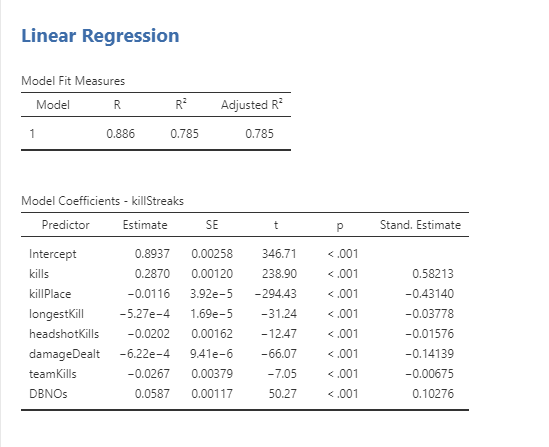

## squad

- DBNOs - Number of enemy players knocked.
- headshotKills - Number of enemy players killed with headshots.
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- kills - Number of enemy players killed.
- killStreaks - Max number of enemy players killed in a short amount of time.
- longestKill - Longest distance between player and player killed at time of - death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- rideDistance - Total distance traveled in vehicles measured in meters.
- teamKills - Number of times this player killed a teammate.
- walkDistance - Total distance traveled on foot measured in meters.
- winPoints - Win-based external ranking of player. (Think of this as an Elo - ranking where only winning matters.)
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [10]:
train_squad

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.60,0,0,0,64,...,0,0.0,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.27,0,0,0,74,...,0,0.0,0,0.000,0,0,65.67,1,0,0.2143
40,ffd9e56f13438e,8df2112760f9e2,3f8b160eeee685,0,1,61.90,1,0,1,31,...,0,529.1,0,0.000,0,0,327.30,2,0,0.3200
55,d79cdeb0ac6eb5,82ff744317632e,6c79fb59bd74c2,2,4,560.80,5,2,9,4,...,0,0.0,0,0.000,0,0,2190.00,7,1534,0.6400
71,83d0b9e08b6e72,1246493aa7619b,55a60d2026f67e,0,3,408.00,2,0,0,5,...,0,0.0,0,226.000,0,0,2135.00,5,1471,0.7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [11]:
train_squad.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# 표본화

In [75]:
from sklearn.model_selection import train_test_split


x=train_squad.drop(['Id','groupId','matchId','matchType','assists','boosts','heals','killPoints','matchDuration','matchType'\
                 ,'maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','vehicleDestroys'\
                 ,'walkDistance','weaponsAcquired','winPoints','winPlacePerc'],axis=1)
y = train_squad['longestKill']
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.3,random_state=0)

test1 =x_train

# x_test2,x_train2,y_test2,y_train2 = train_test_split(train_squad.drop(['Id','groupId','matchId','matchType'],axis=1),train_squad['longestKill'],test_size = 0.2)

# test2 =x_train2



In [81]:
x_train = x_train[['killPlace','kills','killStreaks','longestKill','headshotKills'\
           ,'damageDealt','teamKills','DBNOs']]

In [91]:
test1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs
0,12,2,2,47.260,0,98.95,0,2
1,68,0,0,0.000,0,0.00,0,0
2,21,1,1,60.210,1,137.70,0,1
3,41,1,1,1.665,0,26.67,0,1
4,74,0,0,0.000,0,0.00,0,0
...,...,...,...,...,...,...,...,...
714809,77,0,0,0.000,0,0.00,0,0
714810,12,2,1,40.170,0,104.10,0,2
714811,47,0,0,0.000,0,28.28,0,0
714812,47,0,0,0.000,0,20.61,0,0


In [82]:
x_train

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs
962383,12,2,2,47.260,0,98.95,0,2
164013,68,0,0,0.000,0,0.00,0,0
3968607,21,1,1,60.210,1,137.70,0,1
3265750,41,1,1,1.665,0,26.67,0,1
2833611,74,0,0,0.000,0,0.00,0,0
...,...,...,...,...,...,...,...,...
3428385,77,0,0,0.000,0,0.00,0,0
1397032,12,2,1,40.170,0,104.10,0,2
512294,47,0,0,0.000,0,28.28,0,0
3222305,47,0,0,0.000,0,20.61,0,0


In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [86]:
test1.reset_index(drop=True,inplace=True)
#test2.reset_index(drop=True,inplace=True)

In [87]:
test1 

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs
0,12,2,2,47.260,0,98.95,0,2
1,68,0,0,0.000,0,0.00,0,0
2,21,1,1,60.210,1,137.70,0,1
3,41,1,1,1.665,0,26.67,0,1
4,74,0,0,0.000,0,0.00,0,0
...,...,...,...,...,...,...,...,...
714809,77,0,0,0.000,0,0.00,0,0
714810,12,2,1,40.170,0,104.10,0,2
714811,47,0,0,0.000,0,28.28,0,0
714812,47,0,0,0.000,0,20.61,0,0


- jamovi에서 돌려보기 위해 추출

In [ ]:
#test1.to_csv("squad_test1_0.1.csv")
#test2.to_csv("squad_test2_0.2.csv")

- KMeans

In [ ]:
x =test1[['kills','killPlace','killStreaks']]
x

In [ ]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
distortions = []
for i in range(1,5):
    kmeans =KMeans(n_clusters=i,n_init=10,max_iter=300) #Elbow Method
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,5),distortions,marker='o')
plt.show

- silhouette

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter=100) #silhouette
y_pred = kmeans.fit_predict(x)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x,labels=kmeans.labels_)

In [ ]:
kmeans.cluster_centers_

- 종속변수 추출

In [ ]:
y = kmeans.labels_

In [ ]:
kmeans = KMeans(n_clusters = 2, max_iter=300) #silhouette
y_pred = kmeans.fit_predict(x)
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(x,labels=kmeans.labels_)

In [ ]:
kmeans.cluster_centers_

In [ ]:
y2=kmeans.labels_

In [ ]:
y2

In [ ]:
y=pd.DataFrame(y)

In [ ]:
result_squad_1 = pd.concat([x,y],axis=1)
result_squad_1.columns=['kills','killPlace','killStreaks','target']

In [ ]:
result_squad_1.info()

In [ ]:
result_squad_1.describe(include='all')

In [ ]:
squad0=result_squad_1[result_squad_1['target']==0]

In [ ]:
squad1=result_squad_1[result_squad_1['target']==1]

In [ ]:
squad2=result_squad_1[result_squad_1['target']==2]

In [ ]:
squad0.describe()

In [ ]:
squad1.describe()

In [ ]:
squad2.describe()

In [ ]:
import seaborn as sns
sns.pairplot(result_squad_1,diag_kind='kde',hue="target",palette='bright')
plt.show()

# 사용할 독립변수로 데이터가공

In [18]:
test1.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [88]:
x = test1[['killPlace','kills','killStreaks','longestKill','headshotKills'\
           ,'damageDealt','teamKills','DBNOs']]

x_1 =x_train
x_1

array([[-1.30694746,  0.73137419,  1.96637445, ..., -0.19703439,
        -0.15252875,  0.87460081],
       [ 0.73351848, -0.60280771, -0.74799607, ..., -0.78821137,
        -0.15252875, -0.67038104],
       [-0.97901543,  0.06428324,  0.60918919, ...,  0.03447757,
        -0.15252875,  0.10210989],
       ...,
       [-0.03165625, -0.60280771, -0.74799607, ..., -0.61925245,
        -0.15252875, -0.67038104],
       [-0.03165625, -0.60280771, -0.74799607, ..., -0.66507688,
        -0.15252875, -0.67038104],
       [ 1.24363496, -0.60280771, -0.74799607, ..., -0.78821137,
        -0.15252875, -0.67038104]])

# Scaling

In [20]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_1 = scaler.fit_transform(x_1)

<function matplotlib.pyplot.show(*args, **kw)>

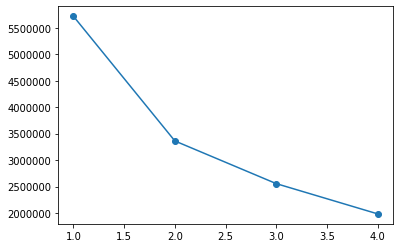

In [89]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
distortions = []
for i in range(1,5):
    kmeans =KMeans(n_clusters=i,n_init=10,max_iter=100) #Elbow Method
    kmeans.fit(x_1)
    distortions.append(kmeans.inertia_)
plt.plot(range(1,5),distortions,marker='o')
plt.show

In [92]:
kmeans.cluster_centers_

array([[-0.84378745,  0.4070736 ,  0.79860409,  0.31628836,  0.15388412,
         0.31301263, -0.15252875,  0.34646118],
       [-1.5447235 ,  2.5046245 ,  1.8377022 ,  1.79376574,  2.02525808,
         2.35753454, -0.10495059,  2.27381273],
       [ 0.73821383, -0.60255716, -0.74748632, -0.44534699, -0.38001156,
        -0.52382332, -0.15252875, -0.54631122],
       [-0.21083733,  0.01349181,  0.09436297, -0.01582922, -0.02216042,
        -0.01032381,  5.87094144,  0.31133712]])

In [102]:
kmeans = KMeans(n_clusters = 2, max_iter=100) 
y_pred = kmeans.fit_predict(x_1)

In [ ]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# silhouette_score(x_1,labels=kmeans.labels_)

In [103]:
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [104]:
y_1_1=kmeans.labels_
y_1_1=pd.DataFrame(y_1_1)
result_squad_1 = pd.concat([x,y_1_1],axis=1)

In [105]:
result_squad_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,0
0,12,2,2,47.260,0,98.95,0,2,0
1,68,0,0,0.000,0,0.00,0,0,1
2,21,1,1,60.210,1,137.70,0,1,0
3,41,1,1,1.665,0,26.67,0,1,1
4,74,0,0,0.000,0,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...
714809,77,0,0,0.000,0,0.00,0,0,1
714810,12,2,1,40.170,0,104.10,0,2,0
714811,47,0,0,0.000,0,28.28,0,0,1
714812,47,0,0,0.000,0,20.61,0,0,1


In [106]:
result_squad_1.columns = ['killPlace','kills','killStreaks','longestKill','headshotKills',\
                          'damageDealt','teamKills','DBNOs','target']

In [107]:
result_squad_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
0,12,2,2,47.260,0,98.95,0,2,0
1,68,0,0,0.000,0,0.00,0,0,1
2,21,1,1,60.210,1,137.70,0,1,0
3,41,1,1,1.665,0,26.67,0,1,1
4,74,0,0,0.000,0,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...
714809,77,0,0,0.000,0,0.00,0,0,1
714810,12,2,1,40.170,0,104.10,0,2,0
714811,47,0,0,0.000,0,28.28,0,0,1
714812,47,0,0,0.000,0,20.61,0,0,1


In [108]:
squad0_0=result_squad_1[result_squad_1['target']==0]
squad0_1=result_squad_1[result_squad_1['target']==1]

In [109]:
squad0_0

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
0,12,2,2,47.260,0,98.95,0,2,0
2,21,1,1,60.210,1,137.70,0,1,0
7,32,1,1,7.928,1,253.10,0,2,0
9,24,2,2,21.000,1,300.00,0,3,0
10,24,1,1,19.120,1,99.43,3,4,0
...,...,...,...,...,...,...,...,...,...
714800,12,1,1,38.840,1,152.50,0,0,0
714801,37,1,1,5.083,1,200.00,0,2,0
714803,21,2,1,90.730,0,245.20,0,4,0
714805,16,2,2,27.430,0,242.90,0,2,0


In [110]:
squad0_1

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
1,68,0,0,0.000,0,0.00,0,0,1
3,41,1,1,1.665,0,26.67,0,1,1
4,74,0,0,0.000,0,0.00,0,0,1
5,90,0,0,0.000,0,0.00,0,0,1
6,47,0,0,0.000,0,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...
714808,44,0,0,0.000,0,0.00,0,0,1
714809,77,0,0,0.000,0,0.00,0,0,1
714811,47,0,0,0.000,0,28.28,0,0,1
714812,47,0,0,0.000,0,20.61,0,0,1


In [111]:
squad0_0.describe() # 잘함

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,185531.000000,185531.000000,185531.000000,185531.000000,185531.000000,185531.000000,185531.000000,185531.000000,185531.0
mean,13.850596,2.818203,1.475834,77.145461,0.734966,330.502273,0.040818,2.398866,0.0
std,8.929599,1.779418,0.660235,78.957048,0.898131,201.875337,0.224201,1.556214,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7.000000,2.000000,1.000000,21.660000,0.000000,200.000000,0.000000,1.000000,0.0
50%,13.000000,2.000000,1.000000,49.990000,1.000000,283.900000,0.000000,2.000000,0.0
75%,19.000000,3.000000,2.000000,107.100000,1.000000,409.500000,0.000000,3.000000,0.0
max,77.000000,23.000000,8.000000,1000.000000,16.000000,3387.000000,4.000000,26.000000,0.0


In [112]:
squad0_1.describe() #못함 

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,529283.000000,529283.000000,529283.000000,529283.000000,529283.000000,529283.000000,529283.000000,529283.000000,529283.0
mean,59.793288,0.232518,0.227001,4.630952,0.036890,62.322863,0.024401,0.331135,1.0
std,21.010588,0.435475,0.419065,13.942936,0.188491,69.880604,0.173202,0.551856,0.0
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,60.000000,0.000000,0.000000,0.000000,0.000000,43.120000,0.000000,0.000000,1.0
75%,78.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.000000,1.0
max,100.000000,3.000000,2.000000,206.100000,1.000000,747.300000,4.000000,8.000000,1.0


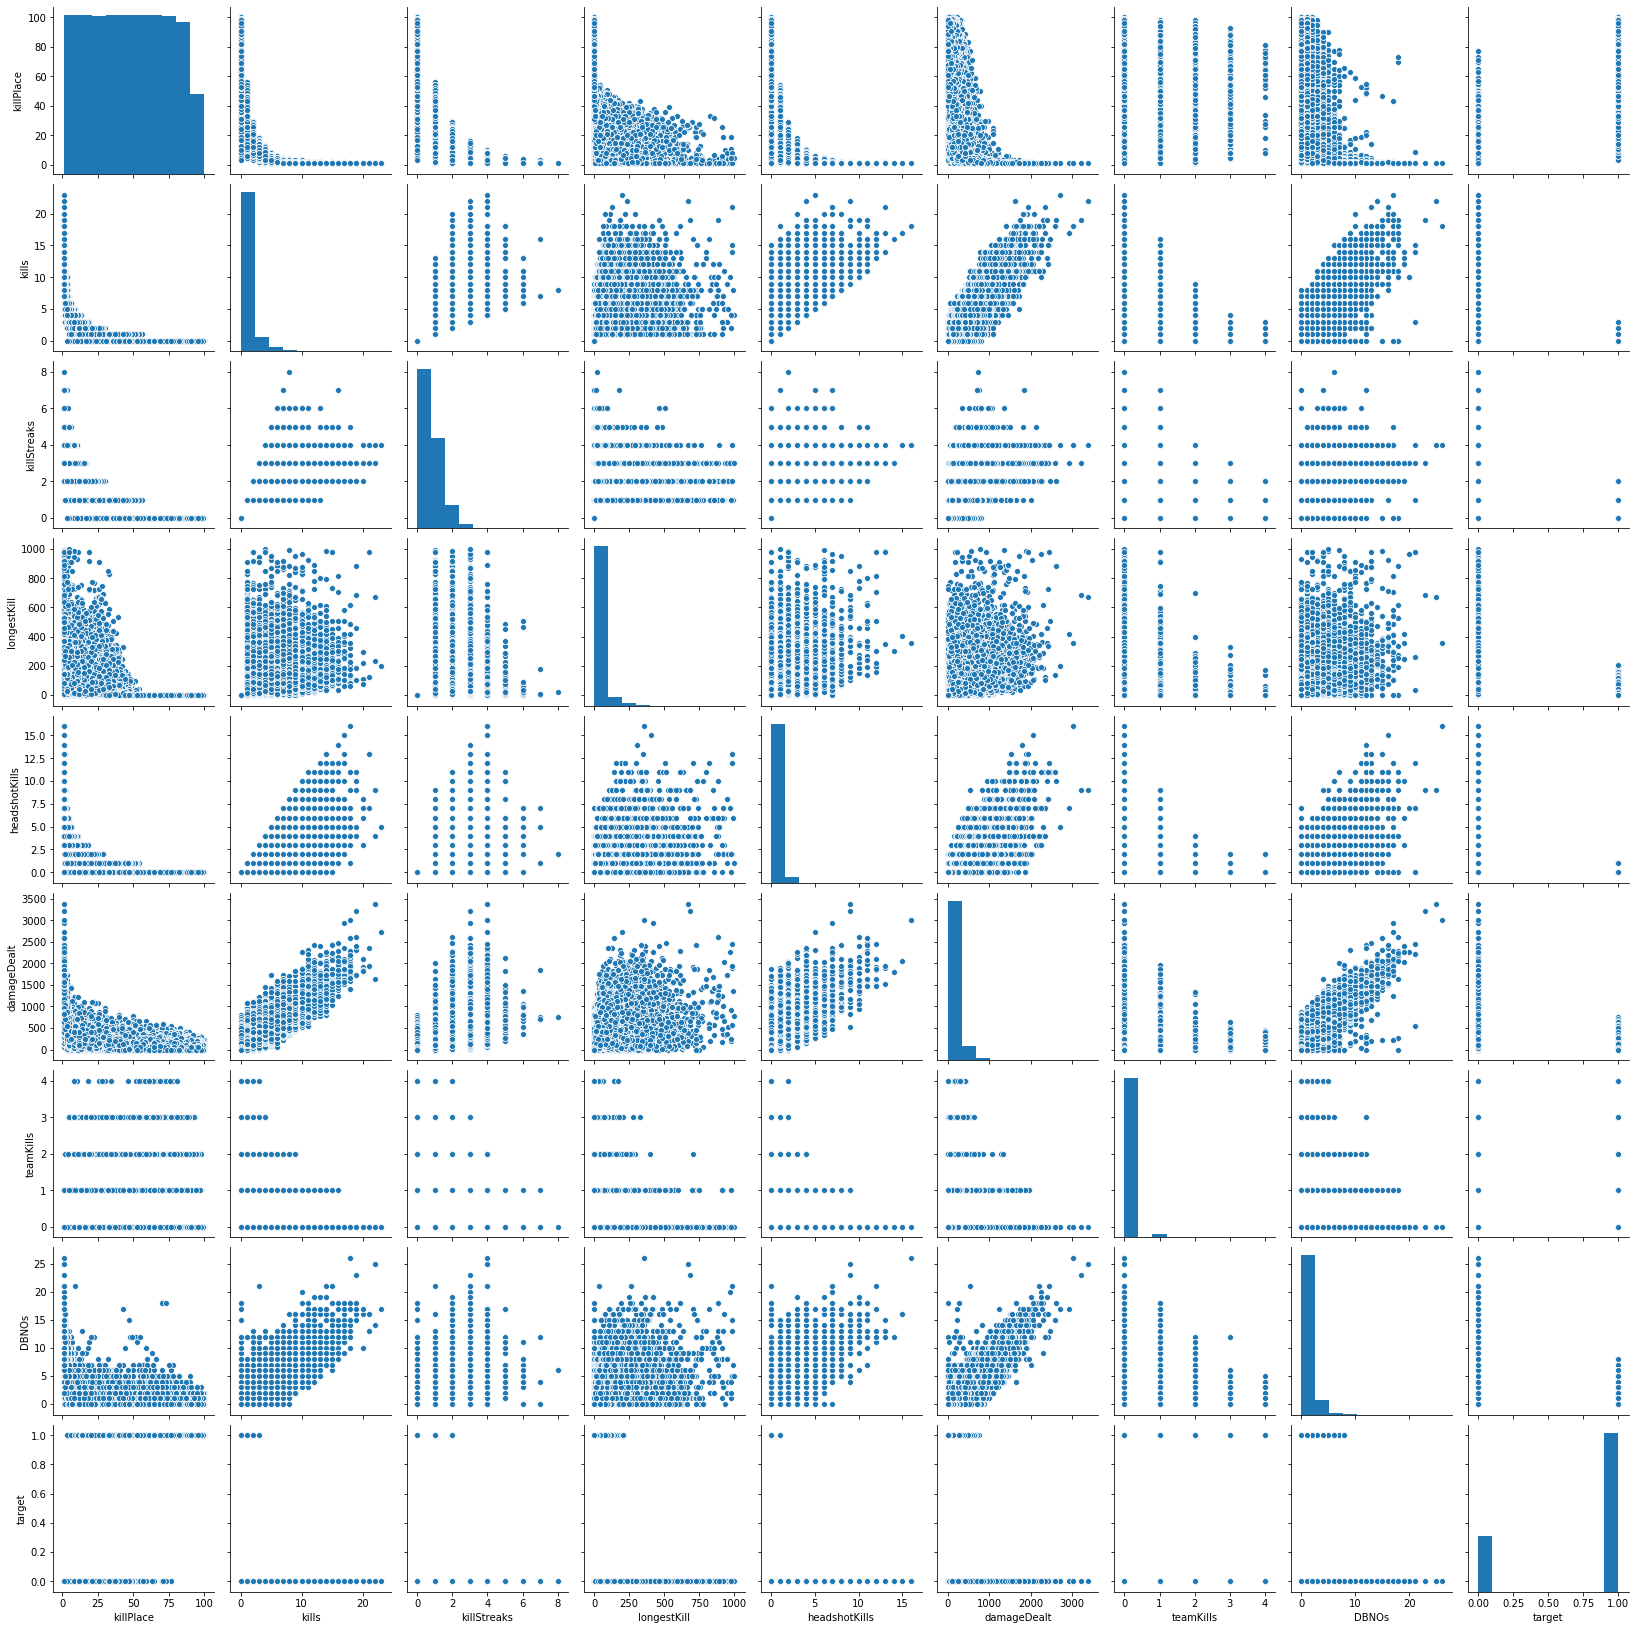

In [113]:
import seaborn as sns
sns.pairplot(result_squad_1,palette='bright')
plt.show()

# 회귀분석

- test data load

In [114]:
test = pd.read_csv('C:/Users/sundooedu/Desktop/test_data_cheatUser.csv')

## VotingClassifier

- DecisionTree
- LogisticRegression
- RandomForest 

In [115]:
X = result_squad_1[['killPlace','kills','killStreaks',\
                        'longestKill','headshotKills','damageDealt','teamKills','DBNOs']]
y = result_squad_1['target']

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=77)

- 스케일링

In [117]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

clflog = LogisticRegression(random_state=1)
clfdt = DecisionTreeClassifier(random_state=1)
clfrf = RandomForestClassifier()
clfgnb = GaussianNB()

eclf_h =VotingClassifier(estimators = [('log',clflog),('dt',clfdt),('rf',clfrf),('gnb',clfgnb)],voting='hard')
eclf_s =VotingClassifier(estimators = [('log',clflog),('dt',clfdt),('rf',clfrf),('gnb',clfgnb)],voting='soft')
models = [clflog,clfdt,clfrf,clfgnb,eclf_h,eclf_s]

In [146]:
from sklearn.metrics import classification_report

for model in models:
  model.fit(X_train,y_train)  
  predictions = model.predict(X_test)
  print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46536
           1       1.00      1.00      1.00    132168

    accuracy                           1.00    178704
   macro avg       1.00      1.00      1.00    178704
weighted avg       1.00      1.00      1.00    178704

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     46536
           1       1.00      1.00      1.00    132168

    accuracy                           1.00    178704
   macro avg       1.00      1.00      1.00    178704
weighted avg       1.00      1.00      1.00    178704

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46536
           1       1.00      1.00      1.00    132168

    accuracy                           1.00    178704
   macro avg       1.00      1.00      1.00    178704
weighted avg       1.00      1.00      1.00    178704

              preci

In [147]:
from sklearn.metrics import confusion_matrix

models_ = [clflog,clfdt,clfrf,clfgnb]
for model in models_:
  pred = model.predict(X_test)
  print(confusion_matrix(y_test,pred))  

[[ 46385    151]
 [     2 132166]]
[[ 46251    285]
 [   262 131906]]
[[ 46392    144]
 [   148 132020]]
[[ 46536      0]
 [  9742 122426]]


## GridSearchCV

In [ ]:
eclf_h1 = VotingClassifier(estimators = [('log',clflog), ('dt',clfdt),('rf',clfrf)],voting='hard')
c_params = [0.001, 0, 0.01, 0.1, 1.0, 10.0, 100.0]
params = {
  'log__solver':['saga'],
  'log__penalty':['l2'],
  'log__C':c_params,  
  'rf__n_estimators':[100,1000],
  'rf__criterion':['entropy'],
  'rf__max_depth':[10,8,7,6,5,4,3,2]
 }
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = eclf_h1, param_grid=params, cv=5)
grid = grid.fit(X_train,y_train)
grid.best_params_

In [148]:
test.columns

Index(['killPlace', 'kills', 'killStreaks', 'longestKill', 'headshotKills',
       'damageDealt', 'teamKills', 'DBNOs'],
      dtype='object')

In [149]:
test

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs
0,1,11,0,124.062920,1,841.73157,0,6
1,5,3,0,67.213910,0,985.33075,0,7
2,5,4,0,112.841064,1,570.33276,0,3
3,3,5,0,55.233852,0,644.26935,0,3
4,17,2,0,33.098873,0,346.97717,0,2
...,...,...,...,...,...,...,...,...
102,9,2,0,278.102230,0,525.27410,0,0
103,10,2,0,124.256420,1,277.00000,0,3
104,6,3,0,329.195280,1,311.90033,0,2
105,1,6,0,94.112070,1,882.13970,0,4


# predict_use_testdata

In [150]:
result =model.predict(test)
result = pd.DataFrame(result)
result.columns = ['target']

In [151]:
total=pd.concat([test,result],axis=1)

In [152]:
total.describe()

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,13.588785,3.672897,0.0,91.687447,0.700935,491.961650,0.056075,2.710280,0.074766
std,17.078594,3.589228,0.0,92.966923,1.381925,443.368398,0.231149,2.101255,0.264252
min,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.0,28.418616,0.000000,228.933090,0.000000,1.000000,0.000000
50%,6.000000,3.000000,0.0,64.584460,0.000000,392.172180,0.000000,3.000000,0.000000
75%,16.500000,5.000000,0.0,124.159670,1.000000,634.579730,0.000000,4.000000,0.000000
max,62.000000,24.000000,0.0,391.527340,12.000000,3528.276600,1.000000,11.000000,1.000000


In [153]:
total

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
0,1,11,0,124.062920,1,841.73157,0,6,0
1,5,3,0,67.213910,0,985.33075,0,7,0
2,5,4,0,112.841064,1,570.33276,0,3,0
3,3,5,0,55.233852,0,644.26935,0,3,0
4,17,2,0,33.098873,0,346.97717,0,2,0
...,...,...,...,...,...,...,...,...,...
102,9,2,0,278.102230,0,525.27410,0,0,0
103,10,2,0,124.256420,1,277.00000,0,3,0
104,6,3,0,329.195280,1,311.90033,0,2,0
105,1,6,0,94.112070,1,882.13970,0,4,0


In [154]:
total[total['target']==1].describe()

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,8.000000,8.0,8.0,8.0,8.0,8.000000,8.000000,8.0,8.0
mean,54.625000,0.0,0.0,0.0,0.0,23.407587,0.125000,0.0,1.0
std,6.843923,0.0,0.0,0.0,0.0,26.541576,0.353553,0.0,0.0
min,43.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0
25%,50.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0
50%,54.500000,0.0,0.0,0.0,0.0,13.440348,0.000000,0.0,1.0
75%,61.250000,0.0,0.0,0.0,0.0,51.194998,0.000000,0.0,1.0
max,62.000000,0.0,0.0,0.0,0.0,56.399998,1.000000,0.0,1.0


In [155]:
total[total['target']==0].describe()

,killPlace,kills,killStreaks,longestKill,headshotKills,damageDealt,teamKills,DBNOs,target
count,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,10.272727,3.969697,0.0,99.096534,0.757576,529.824604,0.050505,2.929293,0.0
std,12.789360,3.569870,0.0,92.772197,1.422063,439.547606,0.220099,2.031650,0.0
min,1.000000,0.000000,0.0,0.000000,0.000000,62.100000,0.000000,0.000000,0.0
25%,2.000000,2.000000,0.0,36.438892,0.000000,273.538025,0.000000,2.000000,0.0
50%,6.000000,3.000000,0.0,71.835266,0.000000,443.656900,0.000000,3.000000,0.0
75%,12.000000,5.000000,0.0,125.890750,1.000000,643.045075,0.000000,4.000000,0.0
max,60.000000,24.000000,0.0,391.527340,12.000000,3528.276600,1.000000,11.000000,0.0


In [131]:
model.predict([[6,8,2,85.3215,0,201.321,0,6]])

array([0])